<a href="https://colab.research.google.com/github/Torrescayo/ML_MIC/blob/main/Proyecto_final_Star_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning


---

**Maestría en Ingeniería en Computación**

**Alumno:** Gerardo Iván Torres Cisneros

**Matrícula:** 234375

**Catedrático:** Dra. Olanda Prieto Ordaz

**Fecha:** 13 de octubre del 2023

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

* obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* alpha = Right Ascension angle (at J2000 epoch)
* delta = Declination angle (at J2000 epoch)
*u = Ultraviolet filter in the photometric system
*g = Green filter in the photometric system
*r = Red filter in the photometric system
*i = Near Infrared filter in the photometric system
*z = Infrared filter in the photometric system
*run_ID = Run Number used to identify the specific scan
*rereun_ID = Rerun Number to specify how the image was processed
*cam_col = Camera column to identify the scanline within the run
*field_ID = Field number to identify each field
*spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
*class = object class (galaxy, star or quasar object)
*redshift = redshift value based on the increase in wavelength
*plate = plate ID, identifies each plate in SDSS
*MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
*fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [131]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [132]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"torrescayo","key":"cbd1ab54f4d07db41bdffe7c18e16d51"}'}

In [133]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [134]:
!unzip sdss17.zip

Archive:  sdss17.zip
replace star_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: star_classification.csv  


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('star_classification.csv')

Explore the data

In [137]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [139]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [141]:
df.corr() #The correlation between the columns

<ipython-input-141-e6c7006a2626>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #The correlation between the columns


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [143]:
df.shape

(100000, 18)

In [144]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [145]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

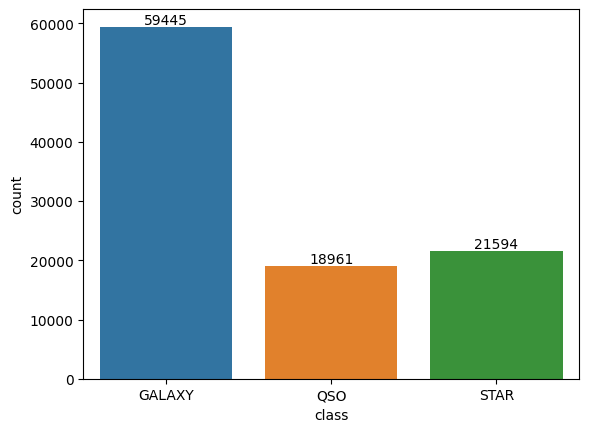

In [146]:
ax=sns.countplot(x=df["class"]);
ax.bar_label(ax.containers[0]);

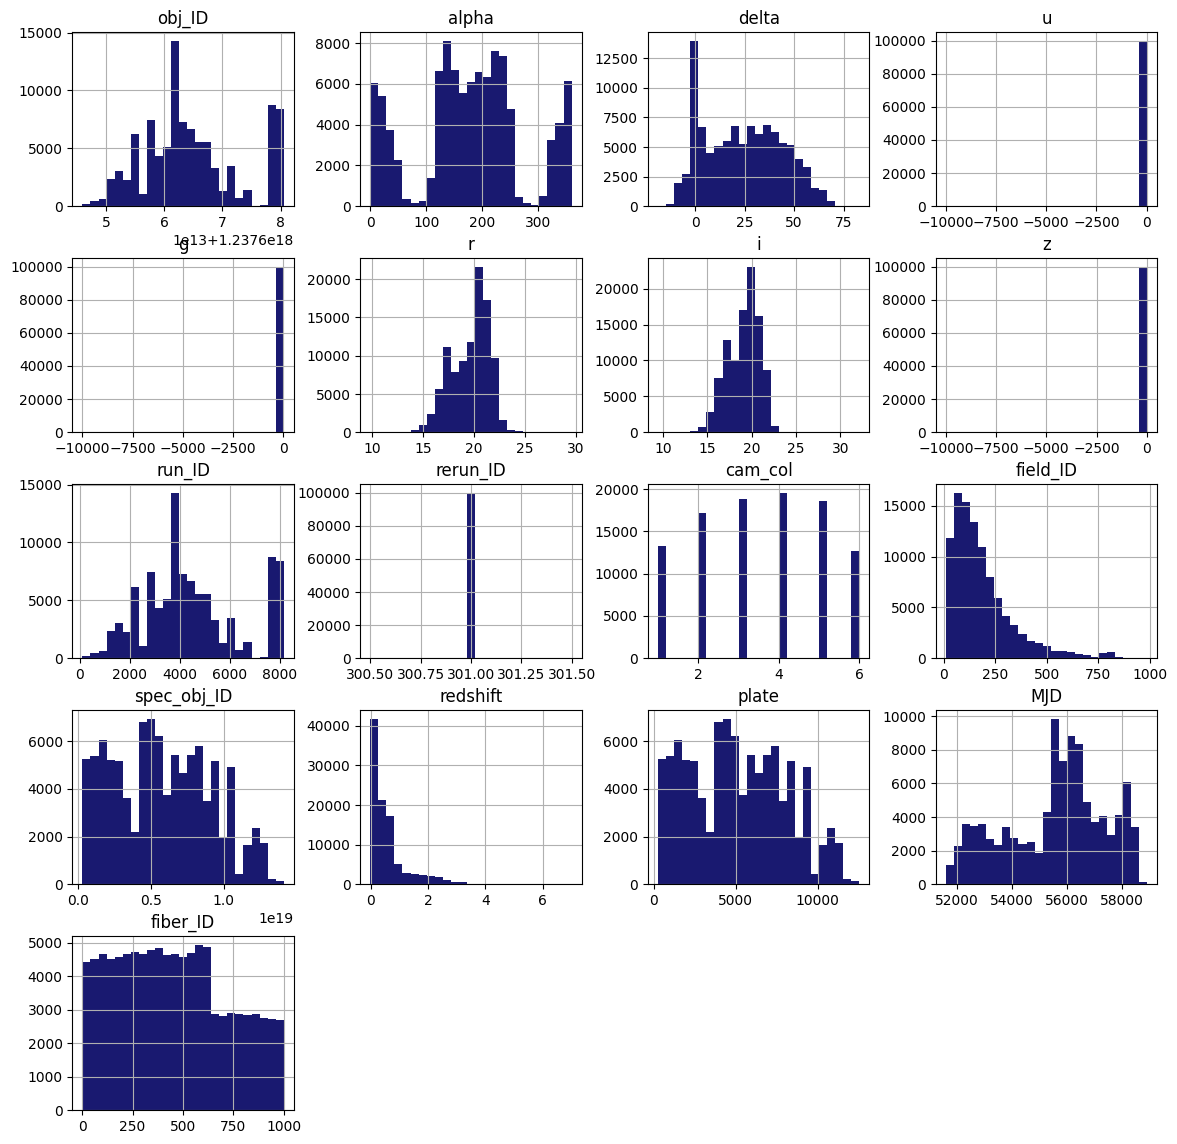

In [147]:
df.hist(bins =25 , figsize= (14,14), color="midnightblue")
plt.show()

We have imablanced data

In [148]:
corr = df.corr()

<ipython-input-148-e0a21ccf356e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [149]:
df["class"]=df["class"].map({"GALAXY":0,"STAR":1,"QSO":2})

In [150]:
abs(df.corr()["class"].sort_values(ascending=False)) #we show the correlation between the class and other data

class          1.000000
redshift       0.536822
i              0.284396
plate          0.215722
spec_obj_ID    0.215722
MJD            0.207262
r              0.150691
delta          0.056643
fiber_ID       0.032053
z              0.017352
cam_col        0.014476
alpha          0.004552
obj_ID         0.000047
run_ID         0.000049
g              0.005915
u              0.017701
field_ID       0.038044
rerun_ID            NaN
Name: class, dtype: float64

In [151]:
numerical_list = ["obj_ID","alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","class","redshift","plate","MJD","fiber_ID"]

Now, we will drop unnecesary columns

In [152]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [153]:
df.head()

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187


In [154]:
#We visualize again the correlation with the data without the columns we are not interested in.
abs(df.corr()["class"].sort_values(ascending=False))

class          1.000000
redshift       0.536822
i              0.284396
plate          0.215722
spec_obj_ID    0.215722
MJD            0.207262
r              0.150691
z              0.017352
g              0.005915
u              0.017701
Name: class, dtype: float64

Correlation of the columns shown in a heatmap

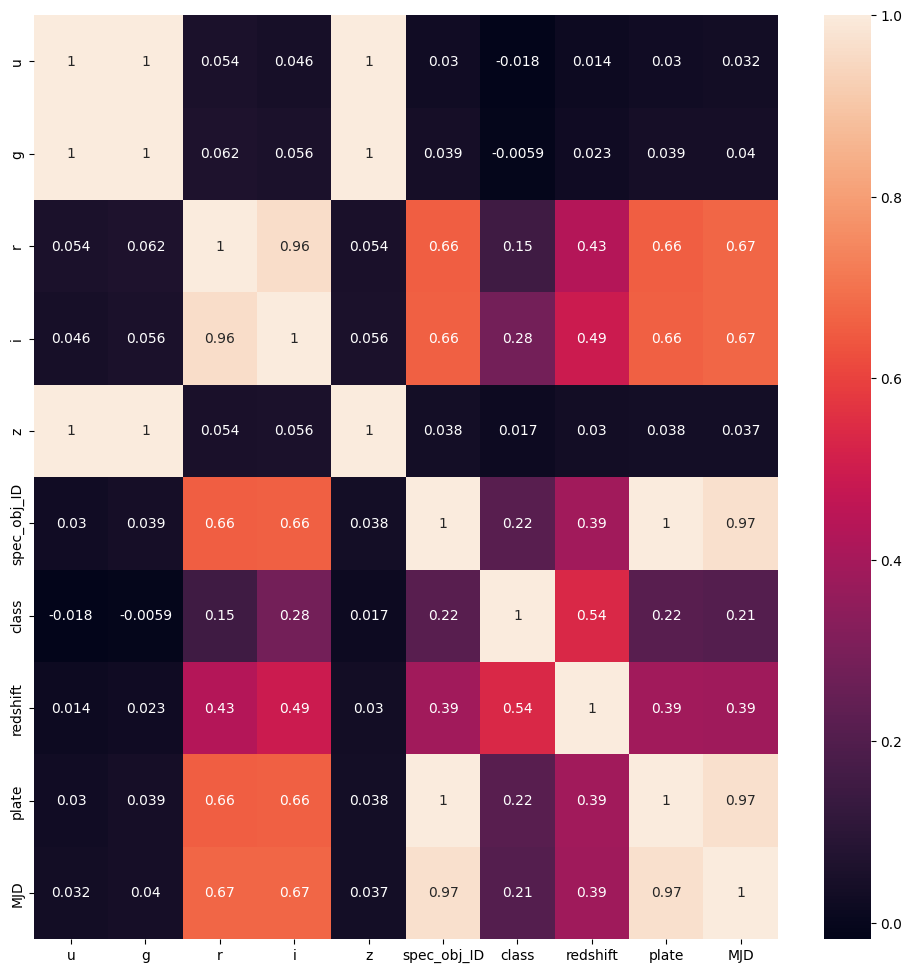

In [155]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True);

Detecting Outliers

In [156]:
numeric_list = ["u","g","r","i","z","spec_obj_ID","redshift","plate","MJD"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0.116123,6121,56187


In [157]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [158]:
x_score = clf.negative_outlier_factor_ #Extracting the anomaly scores from the trained model
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold = np.quantile(x_score , .10) # Calculating the 10th percentile of the anomaly scores to set as a threshold
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist() # Extracting the indices of samples that are considered outliers based on the threshold

In [159]:
threshold

-2.3191353459944413

In [160]:
len(outlier_index)

10000

In [161]:
df.drop(outlier_index, inplace=True) #Dropping Outliers from the DataFrame

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            90000 non-null  float64
 1   g            90000 non-null  float64
 2   r            90000 non-null  float64
 3   i            90000 non-null  float64
 4   z            90000 non-null  float64
 5   spec_obj_ID  90000 non-null  float64
 6   class        90000 non-null  int64  
 7   redshift     90000 non-null  float64
 8   plate        90000 non-null  int64  
 9   MJD          90000 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 7.6 MB


We will improve our imbalacing data

We select the SMOTE technique

Synthetic Minority Oversampling Technique, or SMOTE for short.By simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [163]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [164]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 53812, 1: 18999, 2: 17189})
Resampled dataset shape Counter({0: 53812, 2: 53812, 1: 53812})


In [165]:
print(Counter(y)) # We see our data with the "oversampling"

Counter({0: 53812, 2: 53812, 1: 53812})


Scale the Data - Standartization

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x) # use standard scaler to scale the data

In [167]:
x

array([[ 1.02255883,  0.95403854,  0.37876378, ..., -0.0874935 ,
         0.14460887,  0.3438176 ],
       [ 1.45844252,  1.25186699,  1.62601667, ...,  0.07626756,
         1.68665326,  1.34198438],
       [ 1.69388964,  1.16197479,  0.50110044, ..., -0.07682788,
        -0.26678048, -0.07780274],
       ...,
       [-1.17035654, -0.74141982, -0.61653052, ..., -0.26416877,
        -1.5735075 , -1.98616041],
       [-0.47947886,  0.1628031 ,  0.59856919, ...,  1.28692133,
         0.94775006,  0.90874458],
       [ 0.74892714,  0.65162367,  1.11858279, ...,  1.7019607 ,
        -0.53138771, -0.27090707]])

We will drop the 'Class' column from our data because we don't need it; we are aiming to make predictions about the class.


In [168]:
x,y=df.drop("class",axis=1),df[['class']]

We will split the data into train and test set

In [169]:
from sklearn.model_selection import train_test_split
# split the data to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (72000, 9)
x_test: (18000, 9)
y_train: (72000, 1)
y_test: (18000, 1)
